In [28]:
# import the stuff
from cetsp.core import Circle, Instance, compute_tour_by_2opt, branch_and_bound, Point, plot_solution

In [29]:
# create a simple instance

import random
circles = [Circle(Point(x*0.4, y*0.4), 1) for x in range(16) for y in range(16)]
instance = Instance(circles)

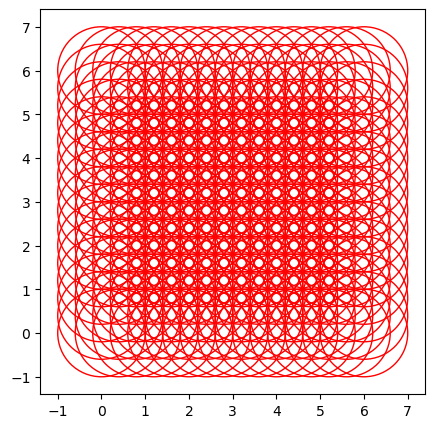

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))
plot_solution(plt.gca(), instance, [])

In [31]:
# compute an initial solution via 2opt
initial_solution = compute_tour_by_2opt(instance)

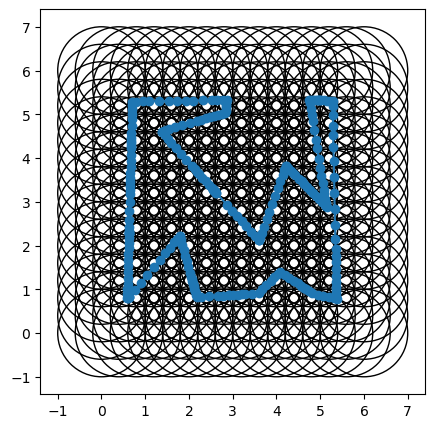

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))
plot_solution(plt.gca(), instance, initial_solution)

In [33]:
initial_solution.length()

29.334489591392046

In [34]:
timelimit = 220
num_nodes_explored = 0
ub, lb = None, None
def count(event):
    #return
    global num_nodes_explored
    global ub
    global lb
    num_nodes_explored += 1
    ub = event.get_upper_bound()
    lb = event.get_lower_bound()
    return
    if not event.current_node.get_relaxed_solution().is_simple():
        event.current_node.prune()
        return
        print("crossing prune!", event.get_relaxed_solution().length())
        plt.figure(figsize=(5, 5))
        plot_solution(plt.gca(), instance, event.get_relaxed_solution(), highlight=event.current_node.get_fixed_sequence())
        plt.show()
        
opt_solution = branch_and_bound(instance, count, initial_solution, timelimit)

Using node simplification.
Using ChFarthestCircle-Branching
Starting with root node of size 4
i	LB	|	UB
0	18.7729	|	29.3345
1	18.7729	|	29.3345
2	18.7729	|	29.3345
3	18.7729	|	29.3345
4	18.7729	|	29.3345
5	18.7729	|	29.3345
6	18.7729	|	29.3345
7	18.7729	|	29.3345
8	18.7729	|	29.3345
9	18.7729	|	29.3345
10	18.7729	|	29.3345
20	18.9524	|	21.0027
30	18.9909	|	21.0027
40	18.9909	|	21.0027
50	18.9909	|	21.0027
60	18.9909	|	21.0027
70	18.9909	|	21.0027
80	18.9909	|	21.0027
90	19.1162	|	21.0027
100	19.1162	|	21.0027
200	19.5111	|	21.0027
300	19.6359	|	21.0027
400	19.7835	|	21.0027
500	19.9246	|	21.0027
600	20.0554	|	21.0027
700	20.0872	|	21.0027
800	20.1711	|	20.9844
900	20.1935	|	20.9844
1000	20.2407	|	20.9844
2000	20.5055	|	20.9844
3000	20.6454	|	20.9844
4000	20.7495	|	20.9844
---------------
4378	20.7775	|	20.9844


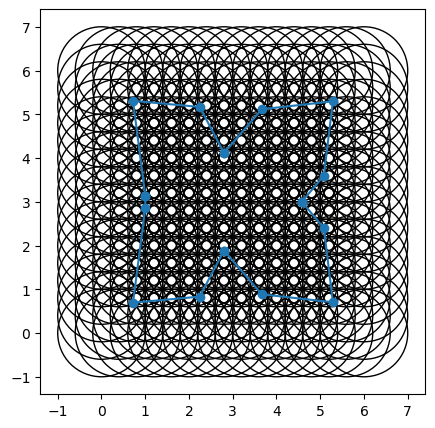

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))
plot_solution(plt.gca(), instance, opt_solution)

In [36]:
num_nodes_explored, lb, ub

(3590, 20.776539685172967, 20.984392640121133)